# Exploratory Data Analysis - Titanic

In this notebook i'm going to show some exploratory analysis tricks with pandas and seaborn library.

The data is an open dataset about titanic survivors, i've take the data from here: https://public.opendatasoft.com/explore/dataset/titanic-passengers/information/

In [10]:
%matplotlib inline  
import matplotlib

import seaborn as sns

import pandas as pd
import numpy as np

df = pd.read_csv('titanic-passengers.csv', delimiter=';', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
155,No,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
162,Yes,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
163,No,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
227,Yes,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
241,No,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In this notebook i'm going to investigate how the variables influence survival chances. The story goes the females and kids had much better odds of surviving, but are there other things at play?

To make nice plots i will start by converting the string survival data (Yes/No) to a numeric format.

In [11]:
df['SurvivedNumeric'] = df['Survived'].apply(lambda x: {'Yes': 1, 'No': 0}.get(x, 0))

## Sex vs survival

First we'll look at Sex, did males or females have better chances?

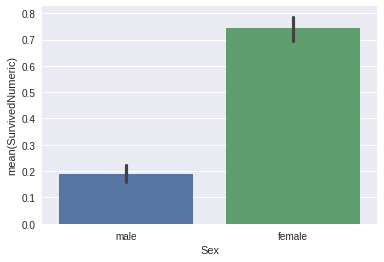

In [13]:
sns.barplot(x="Sex", y="SurvivedNumeric", data=df)

Above chart tells us males indeed had much worse odds of getting into a boat - or they were gentlemen.


## Passenger class vs Survival

Next question up for investigation - did passenger class have any influence? Did upperclass, rich people have better odds? In the titanic movie the gates to the lower class cabins had even been locked. Does the data tell the same story?

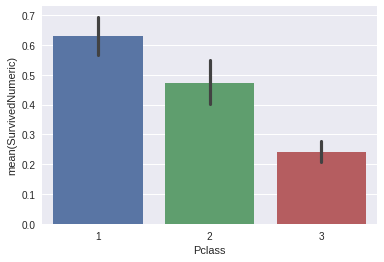

In [14]:
sns.barplot(x="Pclass", y="SurvivedNumeric", data=df)

Indeed, there is strong relation between survival rate and passenger class!


## Harbor of Embarking

Let's see if there is a relation with survival here?

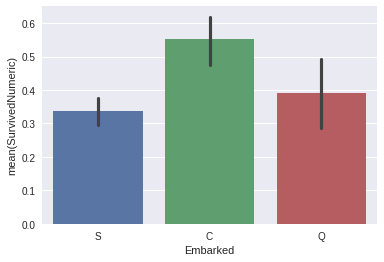

In [15]:
sns.barplot(x="Embarked", y="SurvivedNumeric", data=df)

Yup .. different harbor also had influence.


## Age vs Survival

Is there a relation with Age? Did young or old people have better chances?

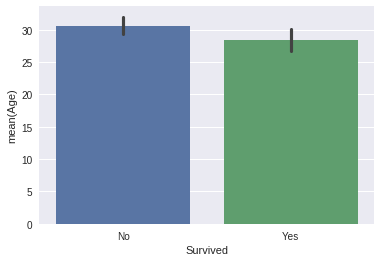

In [16]:
sns.barplot(x="Survived", y="Age", data=df)

The average age of survivors is slightly lower, so that suggests youngers and kids had better chance of getting into a lifeboat.


## Name / Title

If you carefully examine the Name column, there is a "title" for many of the entries. Mr, Mrs or Sir possibly there is some information in there?

Let's extract that part and look at the survival chances of the titles!

In [25]:
df['Title'] = df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

df[['Name', 'Title']].head()

,Name,Title
PassengerId,,
155,"Olsen, Mr. Ole Martin",Mr
162,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",Mrs
163,"Bengtsson, Mr. John Viktor",Mr
227,"Mellors, Mr. William John",Mr
241,"Zabour, Miss. Thamine",Miss


So we've extracted the title, now let's group them into a few categories for easy visualization:

In [26]:
titles = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Royalty",
    "Lady": "Royalty"
}

df['Title'] = df['Title'].map(titles)

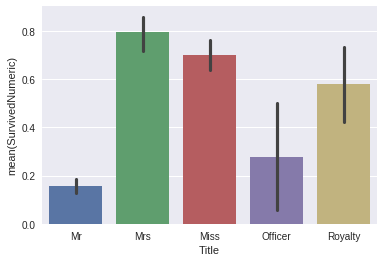

In [27]:
sns.barplot(x="Title", y="SurvivedNumeric", data=df)

There appears to be a strong relation of title vs survival chances! Females and royalty had greatly improved survival chances!